Basic implementation of linear regression

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Dataset

In [ ]:
TRAIN_PATH = '/content/drive/MyDrive/Linear Regression/data/train.csv'
TEST_PATH = '/content/drive/MyDrive/Linear Regression/data/test.csv'

In [ ]:
train_df = pd.read_csv(TRAIN_PATH)
train_df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [ ]:
test_df = pd.read_csv(TEST_PATH)
test_df

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


## Data preprocessing
Check for null values because that will cause errors when running the linear regression algorithm. Data standardization (z-score normalization) and other data preprocessing is not the focus here because the purpose of this notebook is purely to implement the linear regression algorithm, not to optimize training speed, accuracy, or training stability.

In [ ]:
rows = len(train_df)
missing_data = pd.DataFrame(data={'total_missing': np.sum(pd.isna(train_df)), 'perc_missing': np.sum(pd.isna(train_df)/rows*100)})
missing_data

,total_missing,perc_missing
x,0,0.000000
y,1,0.142857


In [ ]:
droprow = train_df.index[train_df['y'].isna()]
train_df = train_df.drop(droprow)
len(train_df)

699

In [ ]:
train_data = {a: train_df[a].to_numpy() for a in ['x', 'y']}
test_data = {a: train_df[a].to_numpy() for a in ['x', 'y']}

In [ ]:
print(f"Training data shape: {train_data['x'].shape}")
print(f"5 samples of data: {train_data['x'][0:5]}")

Training data shape: (699,)
5 samples of data: [24. 50. 15. 38. 87.]


In [ ]:
train_data['y'].shape
train_data['y'][0:5]

array([21.54945196, 47.46446305, 17.21865634, 36.58639803, 87.28898389])

In [ ]:
missing_data = pd.DataFrame(data={'total_missing': np.sum(pd.isna(train_df)), 'perc_missing': np.sum(pd.isna(train_df)/rows*100)})
missing_data

,total_missing,perc_missing
x,0,0.0
y,0,0.0


# Linear Regression Implementation
1. There are general steps to implement. For linear regression and other neural network based algorithms, these steps include:

  1.   Predict
  2.   Calculate Loss
  3.   Calculate gradients
  4.   Gradient descent

Implement

1. Predict
  - We want to predict $y$ given $x$. LR produces a linear line, so the calculation for one sample $x$ will be of the form:
  \begin{align}
    y^{(i)} = ax^{(i)}+b
  \end{align}
  \begin{align}
    vectorized: \underset{(m\times1)}{\mathbf{y}_{pred}} = a\underset{(m\times 1)}{\mathbf{X}} + b, \text{ where m = num of samples, and a, b = weights}
  \end{align}  
  Shape of each variable: y.shape = (m, 1), x.shape = (m, 1), a.shape = (1, 1), b.shape = (1, 1).
2. Loss
  - There are several options for the loss functions. MSE was used here. Note that the loss value is only used to monitor performance.
  \begin{align}
  J = \frac{1}{m} \sum_{i=0}^m(y_{pred}^{(i)} - y^{(i)})^2
  \end{align}
3. Gradients
  - Note that each gradient term is a scalar.
  \begin{align}
  \text{non bias gradients: } \frac{\partial J}{\partial \theta_j} = \frac{2}{m} \sum_{i=0}^m (y_{pred}^{(i)} - y^{(i)})x^{(i)}
  \end{align}

  \begin{align}
  \text{bias gradients: } \frac{\partial J}{\partial b} = \frac{2}{m} \sum_{i=0}^m (y_{pred}^{(i)} - y^{(i)})
  \end{align}
```
  grad[0] = 2/m * np.sum(pred-y)
  grad[1] = 2/m * np.sum((pred-y) * X)
```
4. Update weights
  \begin{align}
  \theta := \theta - \alpha \frac{\partial J}{\partial \theta_j}
  \end{align}

  \begin{align}
  b := b - \alpha \frac{\partial J}{\partial b}
  \end{align}
```
theta[0] = theta[0] - alpha * grad[0]
theta[1] = theta[1] - alpha * grad[1]
```


In [ ]:
def linear_regression(X, y, alpha, epochs, logs):
  m = X.size # num of samples
  X = np.expand_dims(X, axis=1)
  y = np.expand_dims(y, axis=1)
  print(X.shape)
  print(y.shape)
  print(m)
  theta = [np.zeros((1, 1)), np.zeros((1, 1))]
  grad = [np.zeros((1, 1)), np.zeros((1, 1))]
  if logs:
    for i in range(0, epochs):
      print(f"=== epoch {i} ===")
      # predict (mx1)
      pred = theta[0] + X * theta[1]

      # calculate loss (MSE?)
      t0 = pred - y
      loss = 1/m * np.sum(np.power(pred - y, 2))
      print(f"loss: {loss}")
      # calculate gradients
      grad[0] = 2/m * np.sum(pred-y)
      grad[1] = 2/m * np.sum((pred-y) * X)
      # GD
      theta[0] = theta[0] - alpha * grad[0]
      theta[1] = theta[1] - alpha * grad[1]

  else:
    for i in range(0, epochs):
      print(f"=== epoch {i} ===")
      # predict (mx1)
      print(theta[0].shape)
      print(X.shape)
      print(theta[1].shape)
      pred = theta[0] + X * theta[1]
      print(theta[0].shape)
      print(X.shape)
      print(theta[1].shape)
      # calculate loss (MSE?)
      print(f"pred: {pred[0:5]}")
      print(f"y: {y[0:5]}")
      print(f"shape pred: {pred.shape}")
      print(f"shape y: {y.shape}")
      t0 = pred - y
      print(f"t0 {t0[0:5]}")
      t0 = np.power(t0, 2)
      print(f"t0 {t0[0:5]}")
      t0 = np.sum(t0)
      print(f"t0 {t0}")
      t0 = 1/m * t0
      print(f"t0 {t0}")

      loss = 1/m * np.sum(np.power(pred - y, 2))
      print(f"loss: {loss}")
      # calculate gradients
      grad[0] = 2/m * np.sum(pred-y)
      grad[1] = 2/m * np.sum((pred-y) * X)
      print(f"grad 0 shape : {grad[0].shape}")
      print(f"grad 1 shape : {grad[1].shape}")
      # GD
      theta[0] = theta[0] - alpha * grad[0]
      theta[1] = theta[1] - alpha * grad[1]
      # print(f"theta 0: {theta[0]}")
      # print(f"theta 1: {theta[1]}\n")

  y_pred = theta[0] + X * theta[1]
  print('R2 Score:', r2_score(y,y_pred))
  sns.set_theme(palette=sns.color_palette("flare"))

  fig, ax = plt.subplots(figsize=(6,4))
  p1 = sns.scatterplot(x=np.squeeze(X), y=np.squeeze(y), ax=ax)
  p2 = sns.lineplot(x=np.squeeze(X), y=np.squeeze(y_pred), ax=ax, color="black")
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_title('Linear Regression')
  ax.legend(['y', 'y_pred'])

  plt.show()





(699, 1)
(699, 1)
699
=== epoch 0 ===
loss: 3340.1248261786727
=== epoch 1 ===
loss: 375.4546813943529
=== epoch 2 ===
loss: 48.419854883577905
=== epoch 3 ===
loss: 12.34441532061131
=== epoch 4 ===
loss: 8.36490815080648
=== epoch 5 ===
loss: 7.925925612296182
=== epoch 6 ===
loss: 7.877500809021859
=== epoch 7 ===
loss: 7.8721587012638725
=== epoch 8 ===
loss: 7.871569075654196
=== epoch 9 ===
loss: 7.871503699690063
=== epoch 10 ===
loss: 7.871496154102539
=== epoch 11 ===
loss: 7.871494987857573
=== epoch 12 ===
loss: 7.871494525355805
=== epoch 13 ===
loss: 7.871494140517918
=== epoch 14 ===
loss: 7.871493764280659
=== epoch 15 ===
loss: 7.871493389025614
=== epoch 16 ===
loss: 7.871493013912385
=== epoch 17 ===
loss: 7.871492638848264
=== epoch 18 ===
loss: 7.871492263823018
=== epoch 19 ===
loss: 7.8714918888355205
=== epoch 20 ===
loss: 7.871491513885642
=== epoch 21 ===
loss: 7.871491138973363
=== epoch 22 ===
loss: 7.871490764098679
=== epoch 23 ===
loss: 7.87149038926159
==

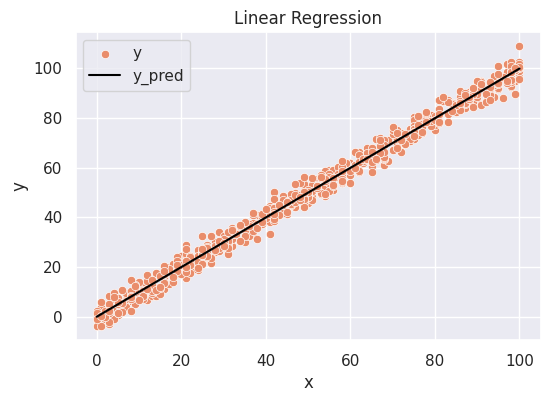

In [ ]:
# Hyperparams
alpha = 0.0001
linear_regression(
    X = train_data['x'],
    y = train_data['y'],
    alpha = alpha,
    epochs = 100,
    logs = True
)